In [13]:
import tensorflow as tf

# TensorFlow GPU kullanımını kontrol etme
print("Num of GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))


Num of GPUs Available:  1


In [12]:
from keras.datasets import cifar10
import matplotlib.pyplot as plt
import numpy as np
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Conv2D,MaxPooling2D,Flatten,Dense,Dropout,BatchNormalization
from keras.optimizers import Adam
from keras.regularizers import l1_l2 #regüle yöntemi

(x_train,y_train),(x_test,y_test) = cifar10.load_data()

#normalizasyon
x_train = x_train.astype("float32")/255
x_test = x_test.astype("float32")/255

#encoding
y_train = to_categorical(y_train,10)
y_test = to_categorical(y_test,10)

#validation data setini aldım
x_train,x_val,y_train,y_val = train_test_split(x_train,y_train,test_size=0.2,random_state=0)

satır,sütun,katman = x_train.shape[1:]

model = Sequential()

model.add(Conv2D(32,(3,3),activation="relu",padding= "same",input_shape=(satır,sütun,katman),kernel_regularizer=l1_l2(0.0001,0.0001 )))
model.add(BatchNormalization()) #Overfittingin önüne geçebilmek için uyguladım

model.add(Conv2D(32,(3,3),activation="relu",padding= "same",kernel_regularizer=l1_l2(0.0001,0.0001 )))
model.add(BatchNormalization()) #Overfittingin önüne geçebilmek için uyguladım
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2)) #Overfittingin önüne geçebilmek için uyguladım

model.add(Conv2D(32,(3,3),activation="relu",padding= "same",kernel_regularizer=l1_l2(0.0001,0.0001 )))
model.add(BatchNormalization())

model.add(Conv2D(32,(3,3),activation="relu",padding= "same",kernel_regularizer=l1_l2(0.0001,0.0001 )))
model.add(BatchNormalization()) #Overfittingin önüne geçebilmek için uyguladım
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.3))#overfittingin önüne geçebilmek için uyguladım

model.add(Conv2D(32,(3,3),activation="relu",padding= "same",kernel_regularizer=l1_l2(0.0001,0.0001 )))
model.add(BatchNormalization())  #Overfittingin önüne geçebilmek için uyguladım

model.add(Conv2D(32,(3,3),activation="relu",padding= "same",kernel_regularizer=l1_l2(0.0001,0.0001 )))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.35)) #Overfittingin önüne geçebilmek için uyguladım

model.add(Flatten())

model.add(Dense(512,activation="relu"))
model.add(BatchNormalization()) #Overfittingin önüne geçebilmek için uyguladım
model.add(Dropout(0.5)) #Overfittingin önüne geçebilmek için uyguladım

model.add(Dense(10,activation="softmax"))

model.compile(Adam(0.001),loss="categorical_crossentropy",metrics=["accuracy"])

cıktı= model.fit(x_train,y_train,epochs=100,validation_data=(x_val,y_val))

model.save("/content/drive/MyDrive/Model/Modelim.h5")



Epoch 1/100
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 19s 7ms/step - accuracy: 0.2941 - loss: 2.4663 - val_accuracy: 0.5232 - val_loss: 1.5668
Epoch 2/100
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 14s 6ms/step - accuracy: 0.5047 - loss: 1.6112 - val_accuracy: 0.6069 - val_loss: 1.3424
Epoch 3/100
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.5884 - loss: 1.3914 - val_accuracy: 0.6270 - val_loss: 1.2446
Epoch 4/100
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.6271 - loss: 1.2606 - val_accuracy: 0.6815 - val_loss: 1.1063
Epoch 5/100
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.6613 - loss: 1.1746 - val_accuracy: 0.7086 - val_loss: 1.0401
Epoch 6/100
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.6805 - loss: 1.1248 - val_accuracy: 0.7138 - val_loss: 1.0440
Epoch 7/100
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.6955 - loss: 1.0888 - val_accuracy: 0.7457 - val_loss: 0.9413
Epoch 8/100
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.7121 - los

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step


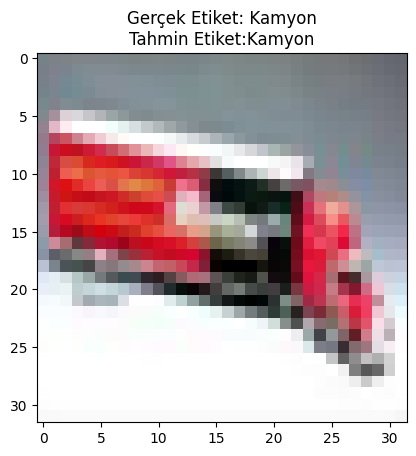

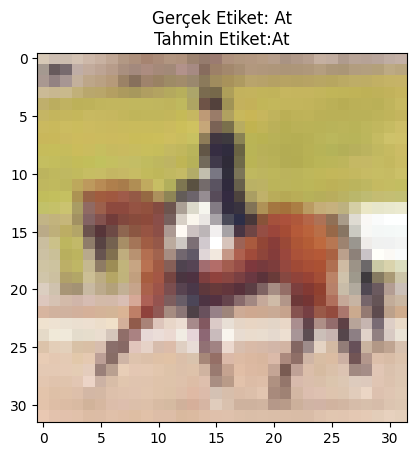

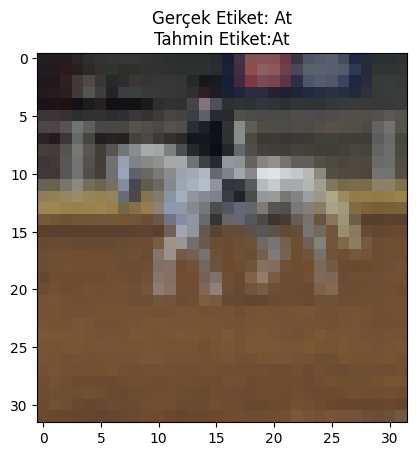

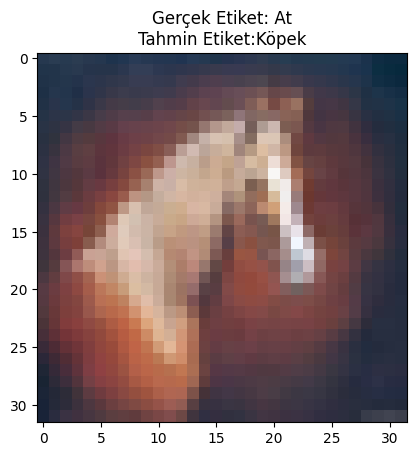

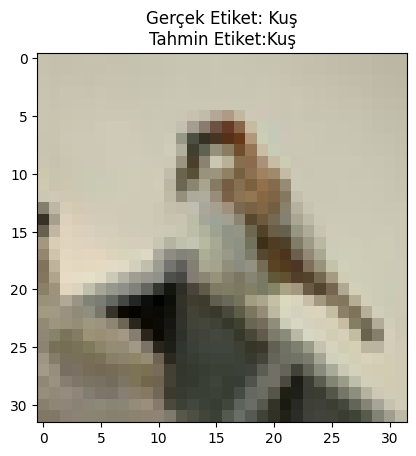

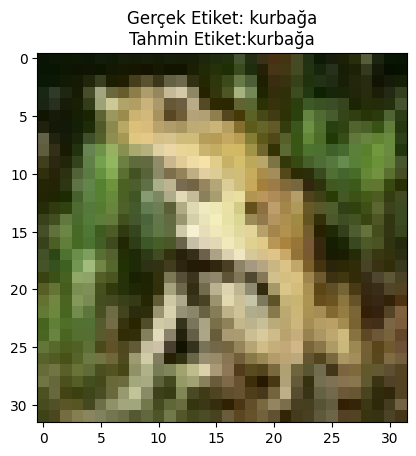

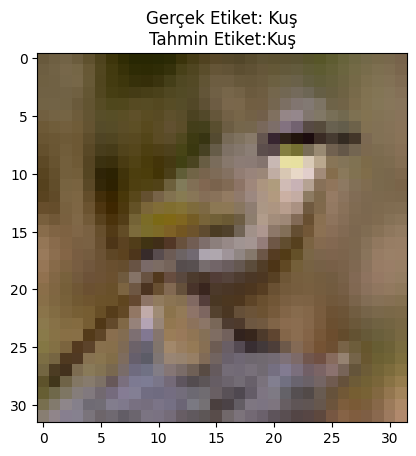

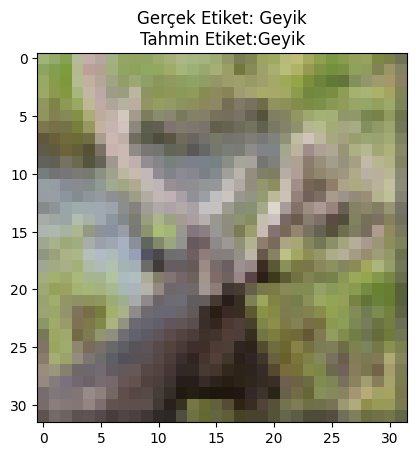

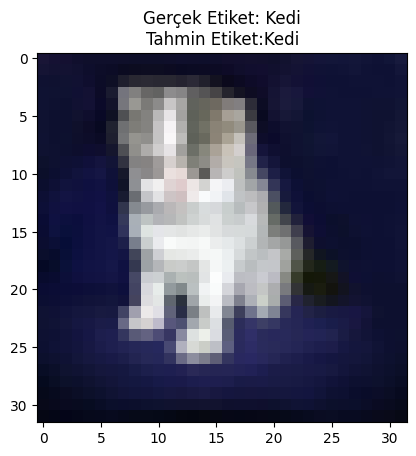

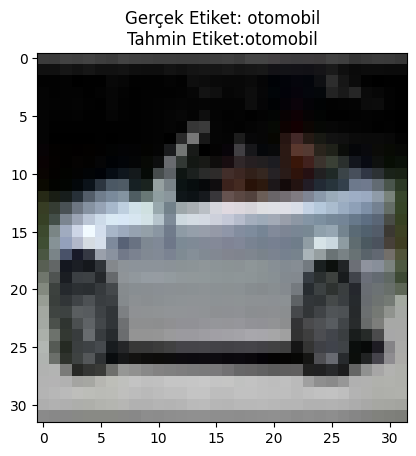

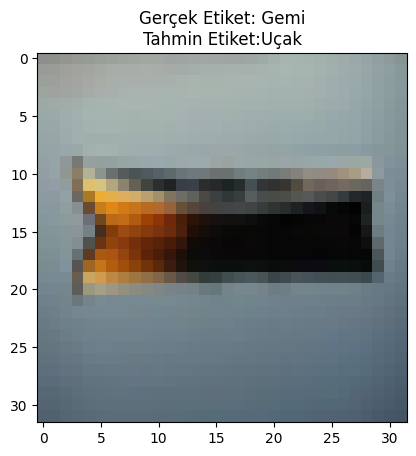

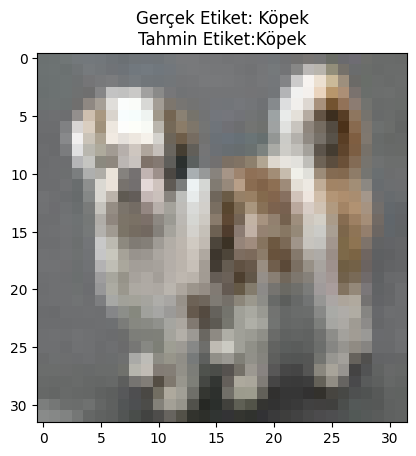

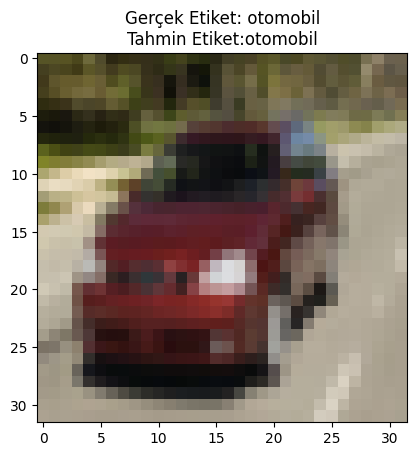

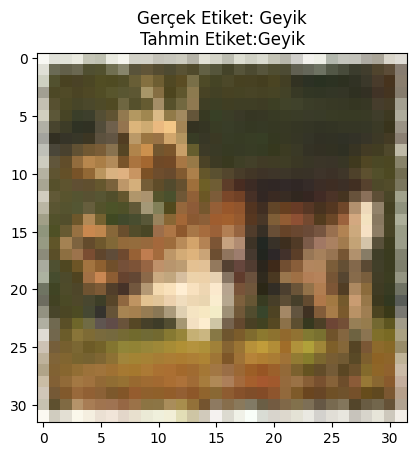

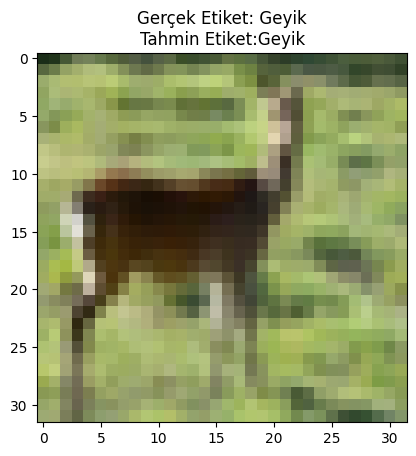

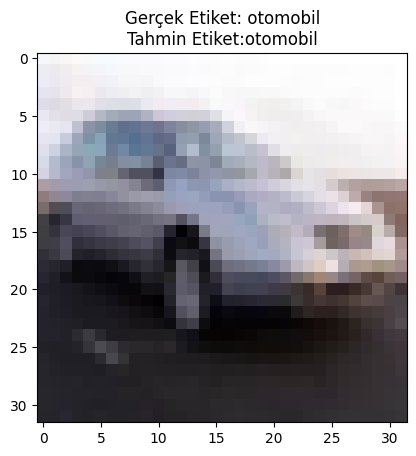

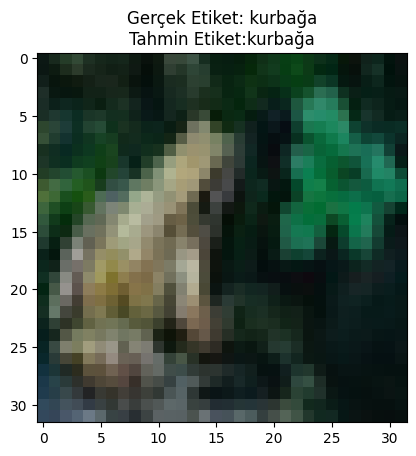

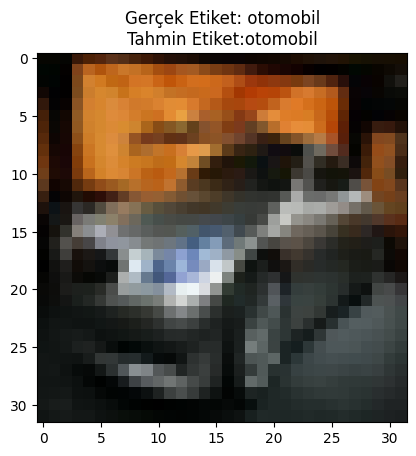

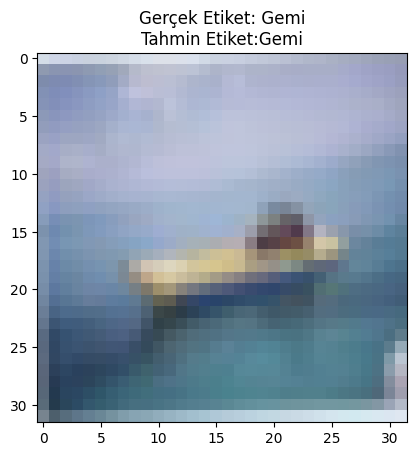

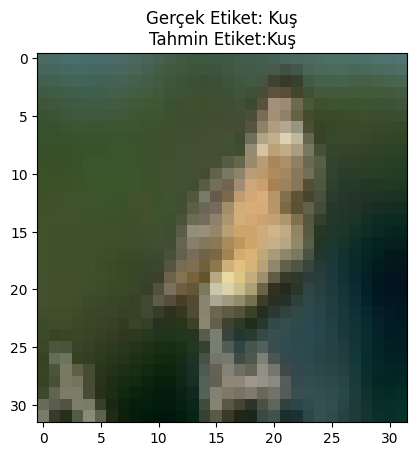

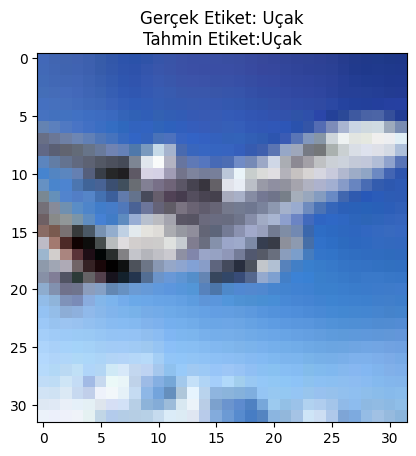

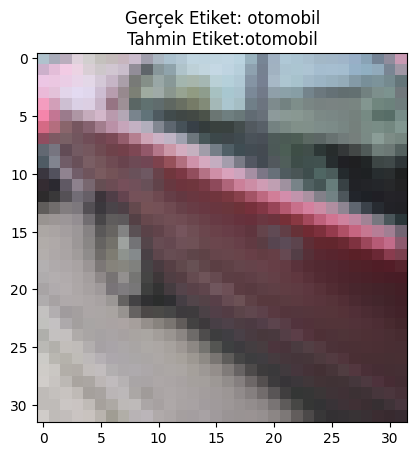

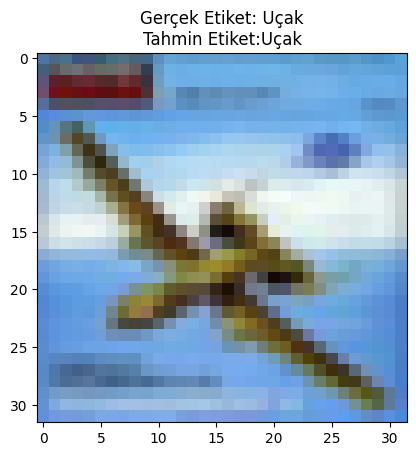

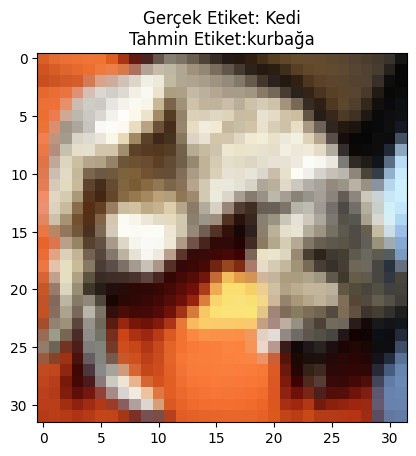

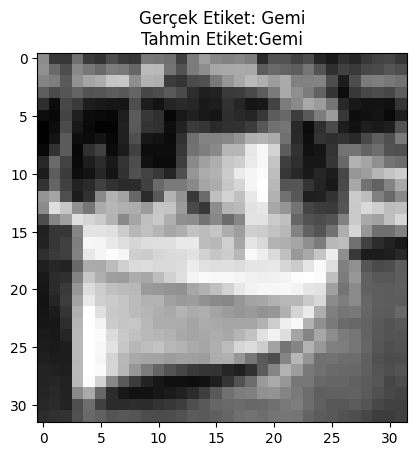

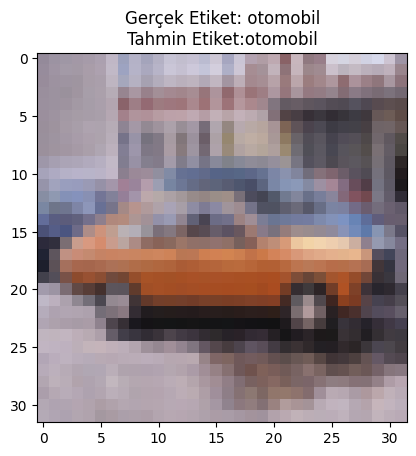

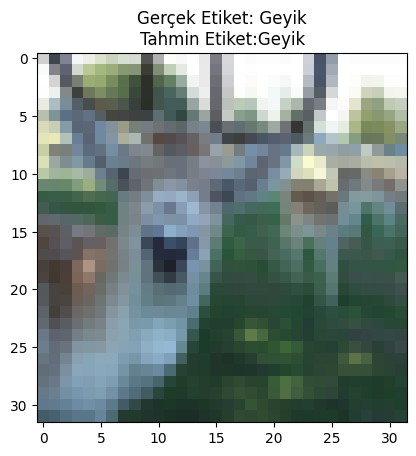

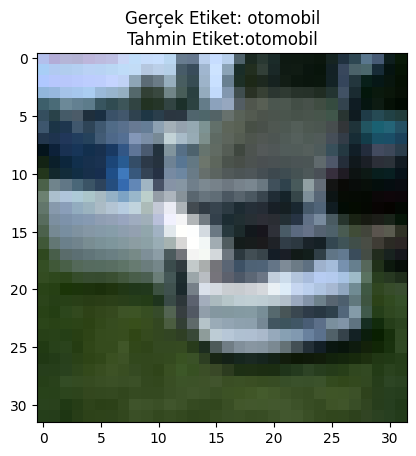

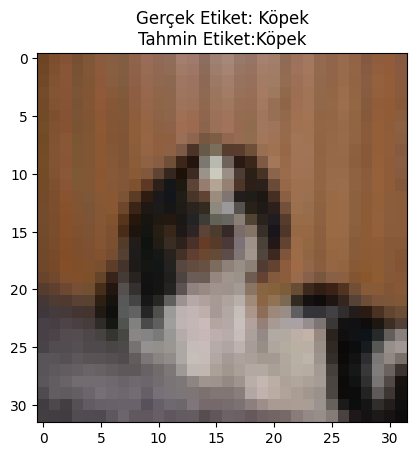

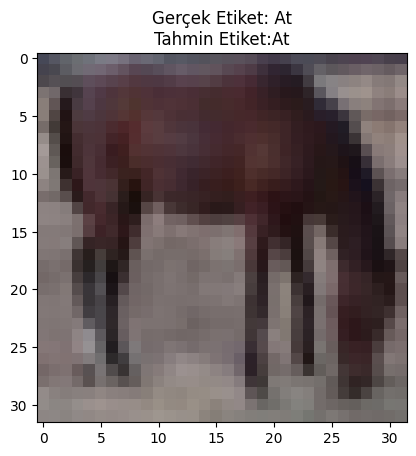

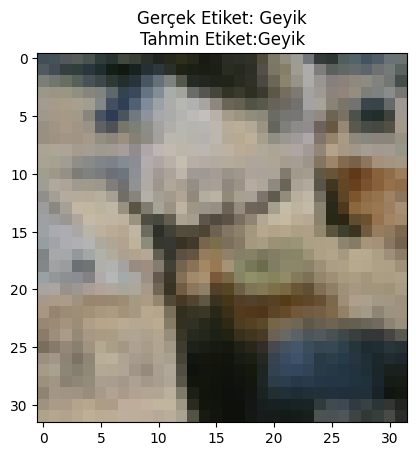

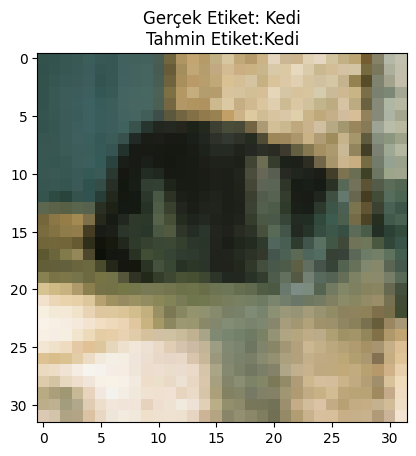

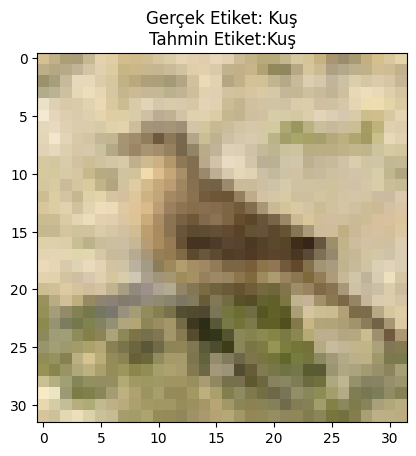

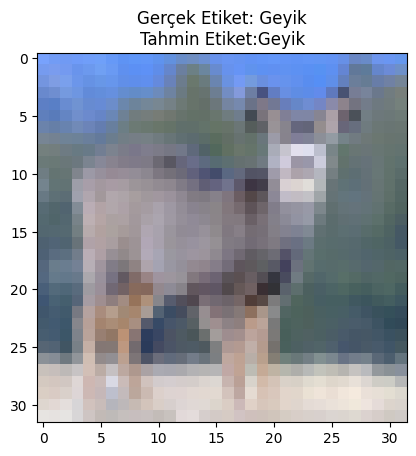

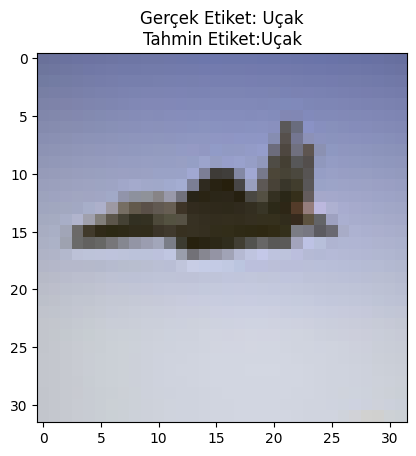

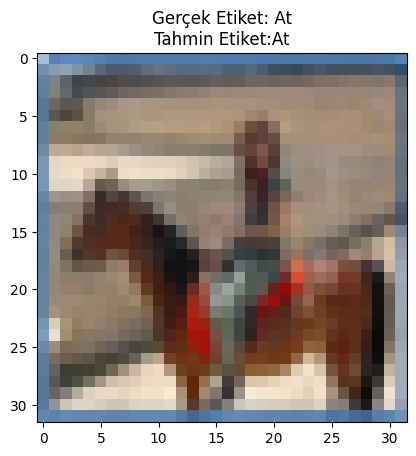

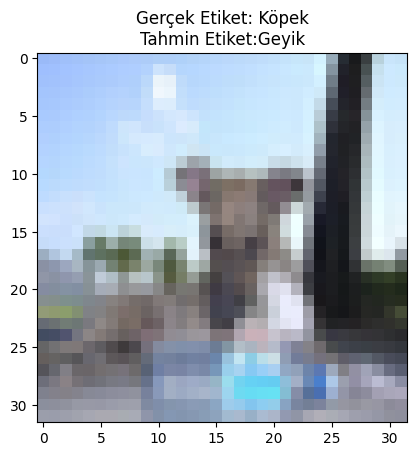

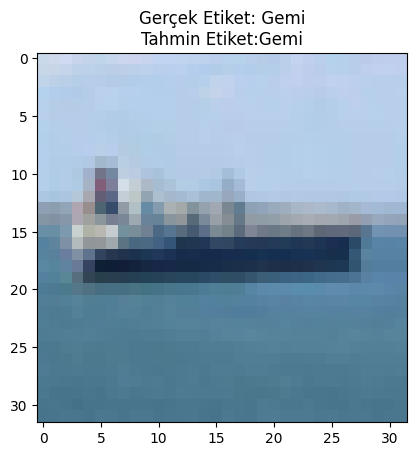

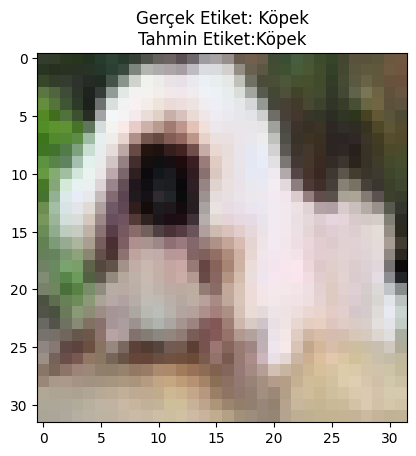

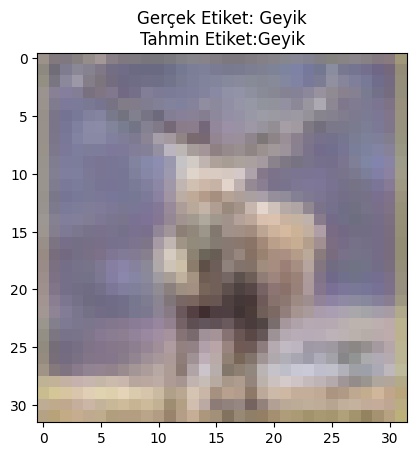

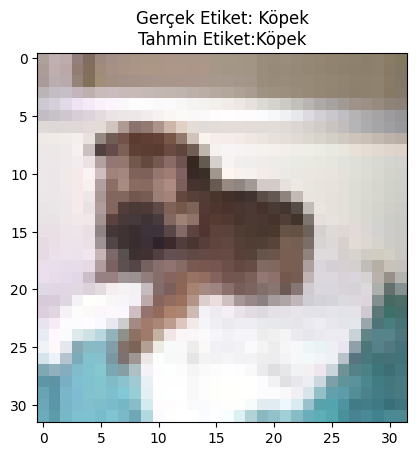

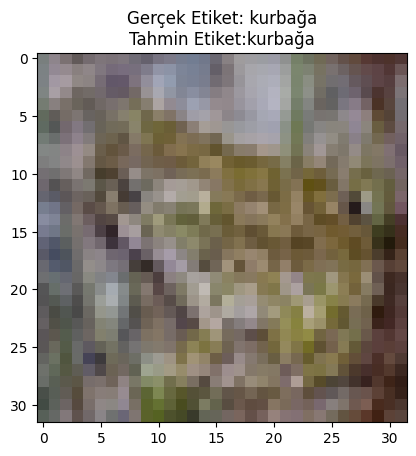

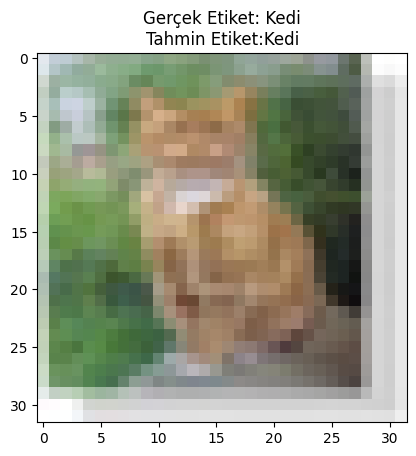

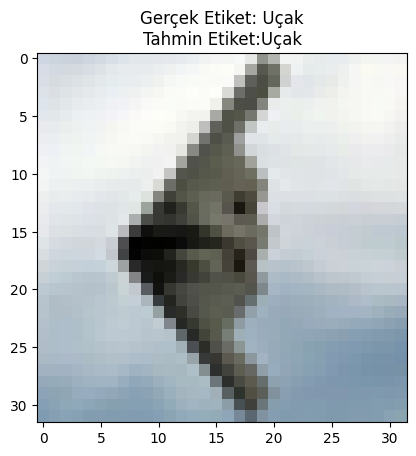

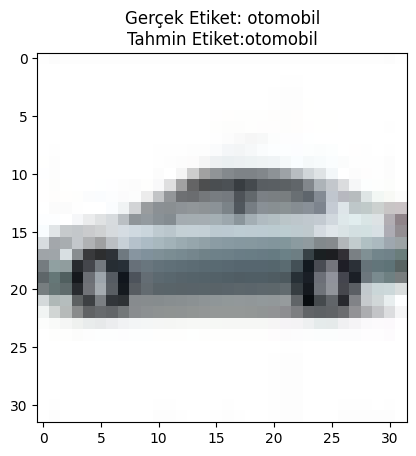

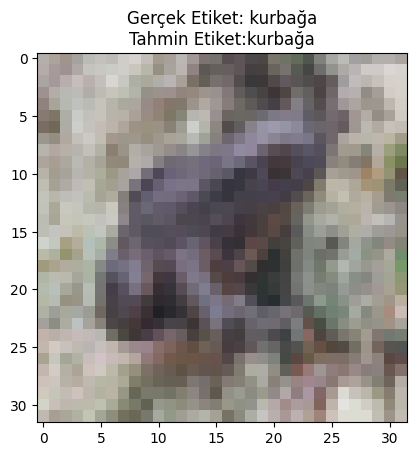

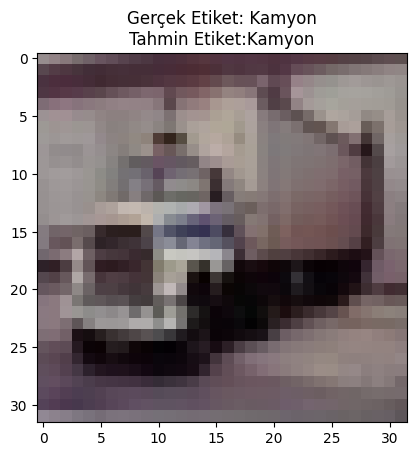

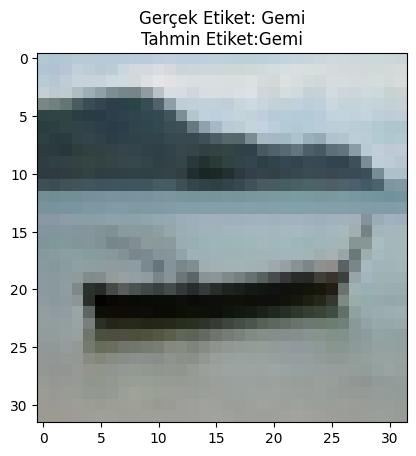

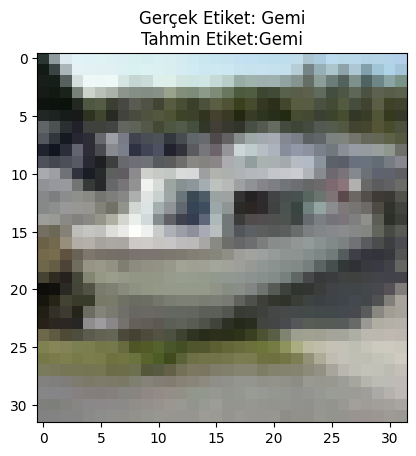

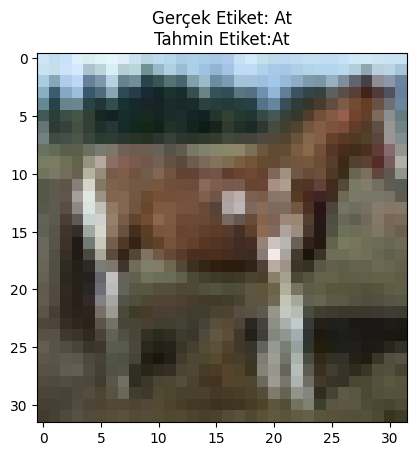

In [14]:
from keras.models import load_model
from keras.datasets import cifar10
import numpy as np
import matplotlib.pyplot as plt

model= load_model("/content/drive/MyDrive/Model/Modelim.h5")

(x_train,y_train),(x_test,y_test) = cifar10.load_data()

x_test = x_test.astype("float32")/255

etiket = ["Uçak","otomobil","Kuş","Kedi","Geyik","Köpek","kurbağa","At","Gemi","Kamyon"]
y_test = [etiket[label[0]] for label in y_test]

tahmin = model.predict(x_test)

for j in range(50):
  i=np.random.randint(0,x_test.shape[0],1)[0]
  plt.imshow(x_test[i])
  plt.title( "Gerçek Etiket: {}\nTahmin Etiket:{}".format(y_test[i],etiket[tahmin[i].argmax()]))
  plt.show()